# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=imperial"

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | bilibino
Processing Record 3 of Set 1 | vilyuchinsk
Processing Record 4 of Set 1 | college
Processing Record 5 of Set 1 | road town
Processing Record 6 of Set 1 | tiksi
Processing Record 7 of Set 1 | bubaque
Processing Record 8 of Set 1 | saint-joseph
Processing Record 9 of Set 1 | verkhniy baskunchak
Processing Record 10 of Set 1 | ulladulla
Processing Record 11 of Set 1 | igbor
Processing Record 12 of Set 1 | ocean city
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | khedbrahma
Processing Record 15 of Set 1 | port lincoln
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | mount isa
Processing Record 18 of Set 1 | tindouf
Processing Record 19 of Set 1 | budesti
Processing Record 20 of Set 1 | qamdo
Processing Record 21 of Set 1 | cruzeiro do sul
Processing Record 22 of Set 1 | abraham's bay
City not found. S

Processing Record 38 of Set 4 | santa cruz
Processing Record 39 of Set 4 | flekkefjord
Processing Record 40 of Set 4 | whitehorse
Processing Record 41 of Set 4 | ribnitz-damgarten
Processing Record 42 of Set 4 | yeniseysk
Processing Record 43 of Set 4 | turkmenbasy
Processing Record 44 of Set 4 | taoudenni
Processing Record 45 of Set 4 | egilsstadir
Processing Record 46 of Set 4 | ambon
Processing Record 47 of Set 4 | lazaro cardenas
Processing Record 48 of Set 4 | geraldton
Processing Record 49 of Set 4 | cheremukhovo
Processing Record 0 of Set 5 | aguilar de campoo
Processing Record 1 of Set 5 | bairnsdale
Processing Record 2 of Set 5 | constantia
Processing Record 3 of Set 5 | badger
Processing Record 4 of Set 5 | urengoy
Processing Record 5 of Set 5 | boende
Processing Record 6 of Set 5 | iskateley
Processing Record 7 of Set 5 | kidal
Processing Record 8 of Set 5 | turtas
Processing Record 9 of Set 5 | longyearbyen
Processing Record 10 of Set 5 | villa la angostura
Processing Recor

Processing Record 30 of Set 8 | north bend
Processing Record 31 of Set 8 | rapid city
Processing Record 32 of Set 8 | tofol
Processing Record 33 of Set 8 | polyarnyy
Processing Record 34 of Set 8 | pointe-noire
Processing Record 35 of Set 8 | minas de marcona
Processing Record 36 of Set 8 | magherafelt
Processing Record 37 of Set 8 | trapani
Processing Record 38 of Set 8 | high river
Processing Record 39 of Set 8 | kapsan-up
Processing Record 40 of Set 8 | timimoun
Processing Record 41 of Set 8 | nahiyat ash shinafiyah
Processing Record 42 of Set 8 | zeya
Processing Record 43 of Set 8 | kalmunai
Processing Record 44 of Set 8 | callao
Processing Record 45 of Set 8 | nago
Processing Record 46 of Set 8 | karratha
Processing Record 47 of Set 8 | villa regina
Processing Record 48 of Set 8 | lake havasu city
Processing Record 49 of Set 8 | riano
Processing Record 0 of Set 9 | margate
Processing Record 1 of Set 9 | bereeda
Processing Record 2 of Set 9 | arenapolis
Processing Record 3 of Set 9

Processing Record 21 of Set 12 | kari
Processing Record 22 of Set 12 | jeddah
Processing Record 23 of Set 12 | chabahar
Processing Record 24 of Set 12 | tsiombe
Processing Record 25 of Set 12 | prineville
Processing Record 26 of Set 12 | cold lake
Processing Record 27 of Set 12 | mendoza
Processing Record 28 of Set 12 | usogorsk
Processing Record 29 of Set 12 | perstorp
Processing Record 30 of Set 12 | dwarka
Processing Record 31 of Set 12 | kloulklubed
Processing Record 32 of Set 12 | l'aquila
Processing Record 33 of Set 12 | papao
Processing Record 34 of Set 12 | sason
Processing Record 35 of Set 12 | puerto lleras
Processing Record 36 of Set 12 | gonzales
-----------------------------
Data Retrieval Complete      
-----------------------------


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,36.12,69,20,9.22,CA,1712718615
1,bilibino,68.0546,166.4372,18.36,78,100,8.93,RU,1712718696
2,vilyuchinsk,52.9306,158.4028,37.92,98,100,2.86,RU,1712718696
3,college,64.8569,-147.8028,39.18,45,75,9.22,US,1712718696
4,road town,18.4167,-64.6167,77.25,69,20,20.98,VG,1712718623


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("/Users/hannahkollmann/Desktop/Vanderbilt/Homework/Module 6 API Challenge/output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("/Users/hannahkollmann/Desktop/Vanderbilt/Homework/Module 6 API Challenge/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,36.12,69,20,9.22,CA,1712718615
1,bilibino,68.0546,166.4372,18.36,78,100,8.93,RU,1712718696
2,vilyuchinsk,52.9306,158.4028,37.92,98,100,2.86,RU,1712718696
3,college,64.8569,-147.8028,39.18,45,75,9.22,US,1712718696
4,road town,18.4167,-64.6167,77.25,69,20,20.98,VG,1712718623


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

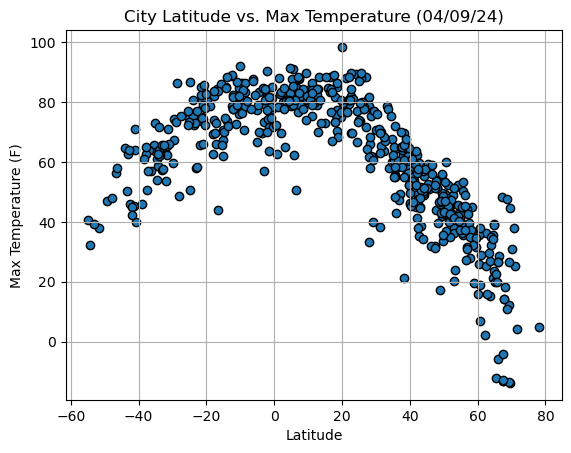

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha = 1, edgecolors= "black", marker= "o")


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime('%x'))
plt.grid(True)

# Save the figure
plt.savefig("/Users/hannahkollmann/Desktop/Vanderbilt/Homework/Module 6 API Challenge/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

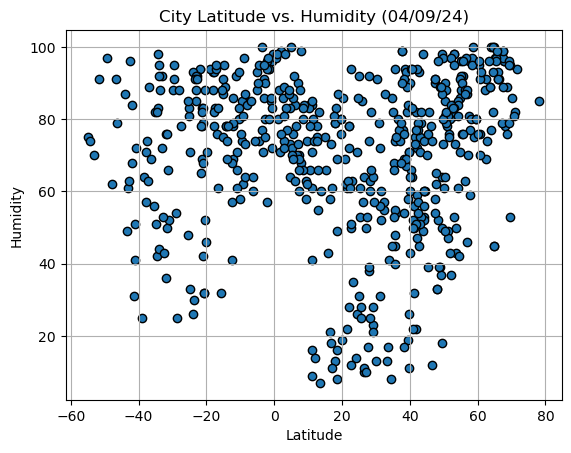

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha = 1, edgecolors = "black", marker= "o")


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity (%s)" % time.strftime('%x'))
plt.grid(True)

# Save the figure
plt.savefig("/Users/hannahkollmann/Desktop/Vanderbilt/Homework/Module 6 API Challenge/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

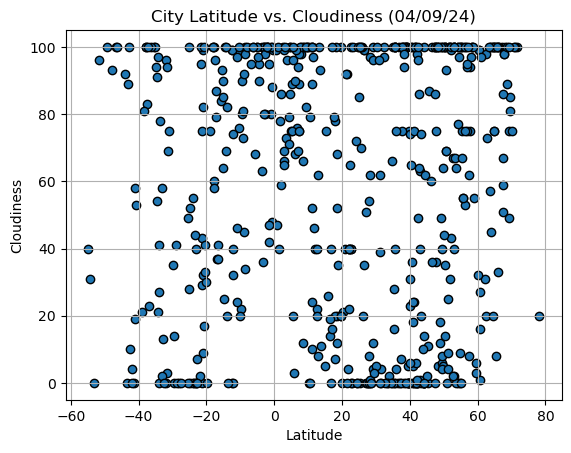

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha = 1, edgecolors = "black", marker= "o")


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime('%x'))
plt.grid(True)

# Save the figure
plt.savefig("/Users/hannahkollmann/Desktop/Vanderbilt/Homework/Module 6 API Challenge/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

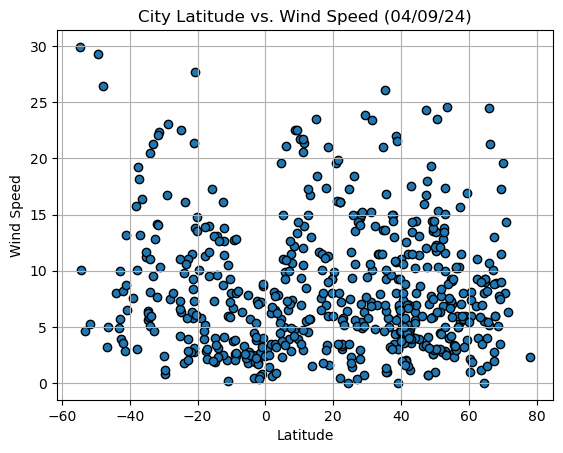

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha = 1, edgecolors = "black", marker= "o")


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime('%x'))
plt.grid(True)

# Save the figure
plt.savefig("/Users/hannahkollmann/Desktop/Vanderbilt/Homework/Module 6 API Challenge/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
# These will be defined for each individual plot becuase I am to unsure how to code this for all plots

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,36.12,69,20,9.22,CA,1712718615
1,bilibino,68.0546,166.4372,18.36,78,100,8.93,RU,1712718696
2,vilyuchinsk,52.9306,158.4028,37.92,98,100,2.86,RU,1712718696
3,college,64.8569,-147.8028,39.18,45,75,9.22,US,1712718696
4,road town,18.4167,-64.6167,77.25,69,20,20.98,VG,1712718623


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere_df = city_data_df[city_data_df["Lat"] < 0]


# Display sample data
southern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
7,saint-joseph,-21.3667,55.6167,73.78,83,29,6.02,RE,1712718697
9,ulladulla,-35.3500,150.4667,65.77,56,100,11.25,AU,1712718697
12,ushuaia,-54.8000,-68.3000,40.66,75,40,29.93,AR,1712718697
14,port lincoln,-34.7333,135.8667,63.46,51,94,5.59,AU,1712718457
15,waitangi,-43.9535,-176.5597,64.81,87,92,8.01,NZ,1712718698


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8729184589262765


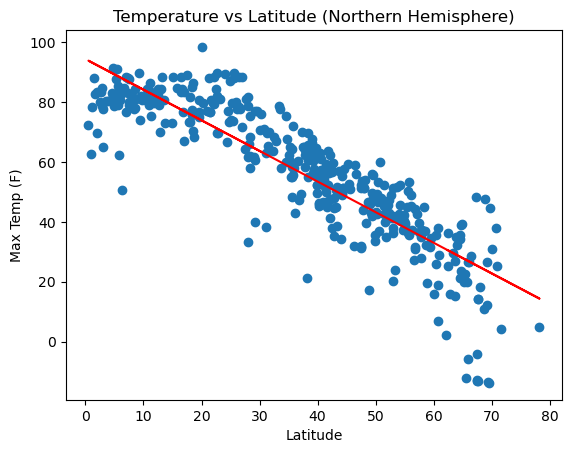

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot values calculated above
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title(f"Temperature vs Latitude (Northern Hemisphere)")
print(f'The r-value is {rvalue}')


The r-value is 0.7212501461484394


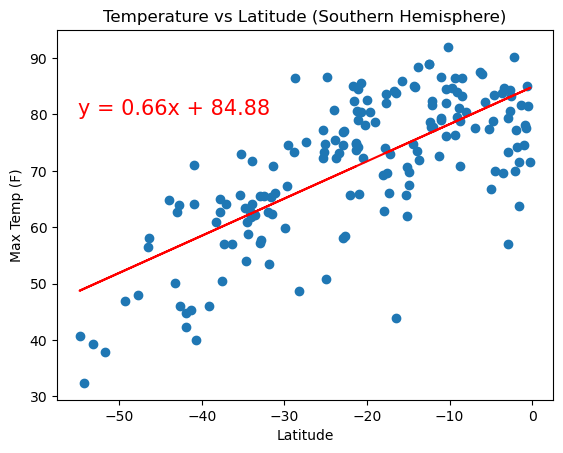

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot values calculated above
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-55,80),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title(f"Temperature vs Latitude (Southern Hemisphere)")
print(f"The r-value is {rvalue}")


**Discussion about the linear relationship:** 
The northern hemisphere shows a negative association due to the temperature decreasing as the latitude increases. This is displayed as you move towards the right. To me, it makes sense because when we move farther away from the equator (either north or south), temperatures will generally be colder.

The southern hemisphere shows a positive association due to the temperature increasing as the latitude increases. This is displayed as you move towards the right. This also makes sense because temperatures get warmer since you are moving closer to the equator. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.2268523932050287


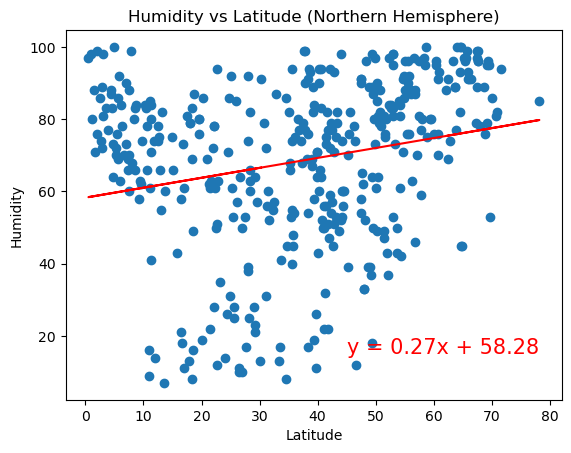

In [18]:
# Northern Hemisphere
x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot values calculated above
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(45,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"Humidity vs Latitude (Northern Hemisphere)")
print(f'The r-value is {rvalue}')

The r-value is 0.2638946568419053


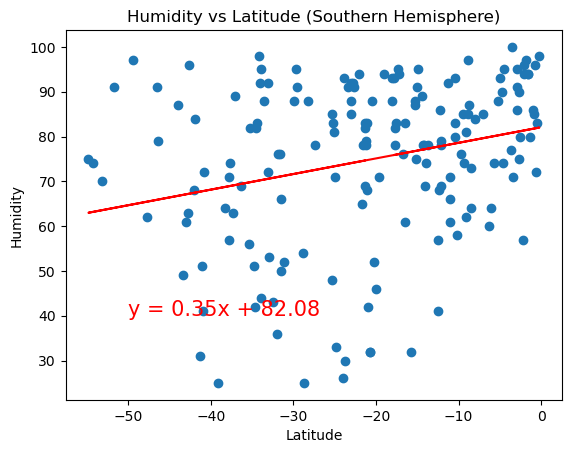

In [19]:
# Southern Hemisphere
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot values calculated above
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-50,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"Humidity vs Latitude (Southern Hemisphere)")
print(f"The r-value is {rvalue}")

**Discussion about the linear relationship:** Based on the correlaton coefficient, there seems to be a weak correlation between Humidity and Latitude for both hemispheres. This is evident when you look at the graphs since the points are extremely spread out and do not tend to cluster close together as they did in the previous plots. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.043859652084568365


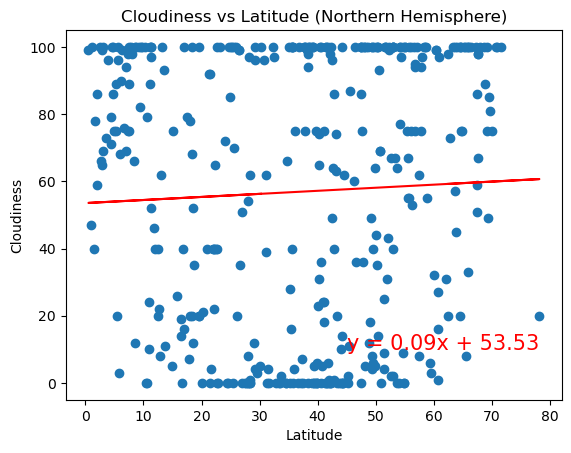

In [20]:
# Northern Hemisphere
x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot values calculated above
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"Cloudiness vs Latitude (Northern Hemisphere)")
print(f'The r-value is {rvalue}')

The r-value is 0.280717528619113


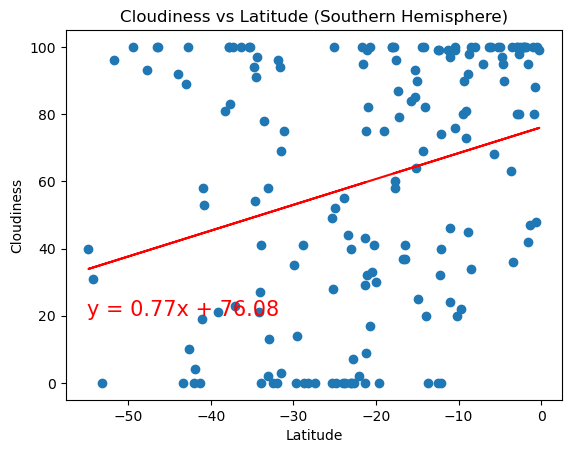

In [21]:
# Southern Hemisphere
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot values calculated above
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"Cloudiness vs Latitude (Southern Hemisphere)")
print(f"The r-value is {rvalue}")

**Discussion about the linear relationship:** Based on the correlation coeeficient, the corerlation seems to be weak to none. This is evident from the data points being spread out more. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is -0.07188812297891217


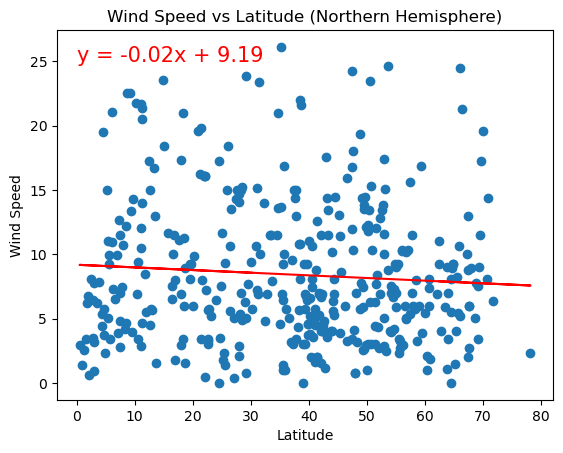

In [26]:
# Northern Hemisphere
x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot values calculated above
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(0,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"Wind Speed vs Latitude (Northern Hemisphere)")
print(f'The r-value is {rvalue}')

the r-value is -0.3828569255948572


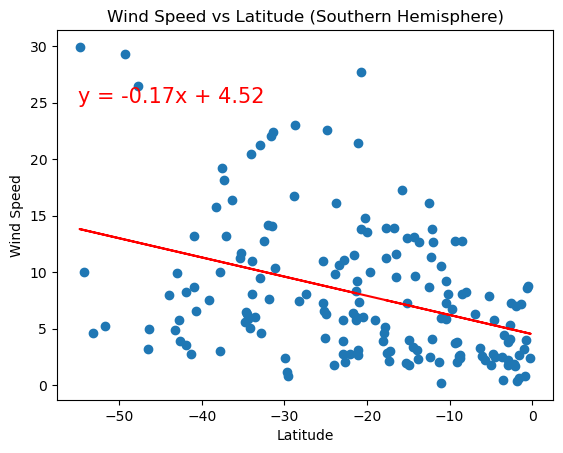

In [27]:
# Southern Hemisphere
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot values calculated above
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"Wind Speed vs Latitude (Southern Hemisphere)")
print(f"the r-value is {rvalue}")

**Discussion about the linear relationship:** In both hemispheres, we see almost no correlation between wind speed and latitude. The evidence is provided by the correlation coefficient. 